### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [15]:
df= pd.read_csv('kc_house_data.csv')

### Feature Engineering 

In [16]:
df['date']= pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda d : d.month)
df['year'] = df['date'].apply(lambda d : d.year)

In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

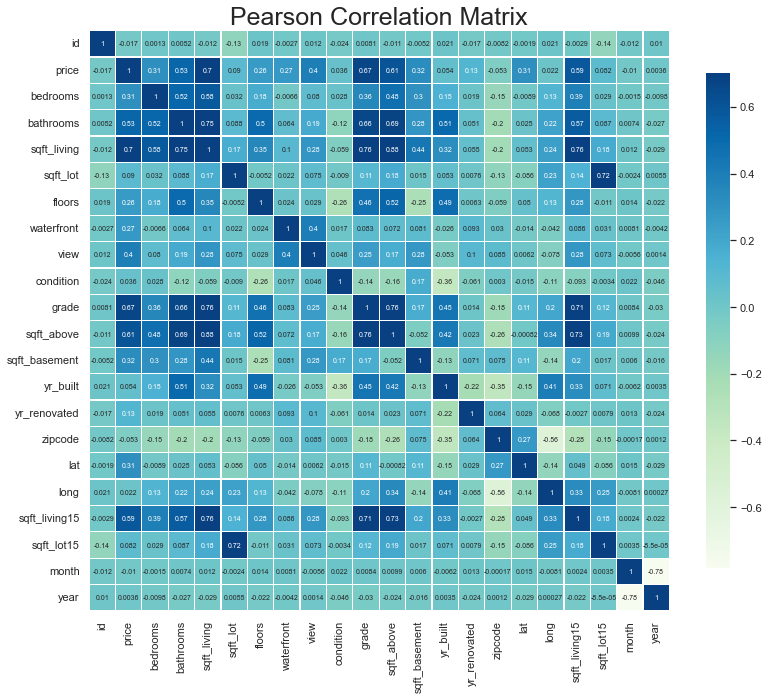

In [18]:
# Checking The Correlation of different features with Price
import seaborn as sns

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [19]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [20]:
# Removing Features 
df.drop(columns= ['id', 'zipcode', 'month', 'date'], inplace= True)
df['year']= df['year'].astype("int32")

### Outlier Removal

<AxesSubplot:>

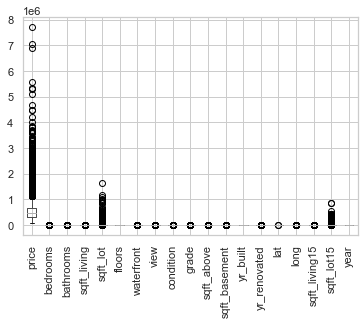

In [21]:
df.boxplot(rot= 90)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year']


<AxesSubplot:>

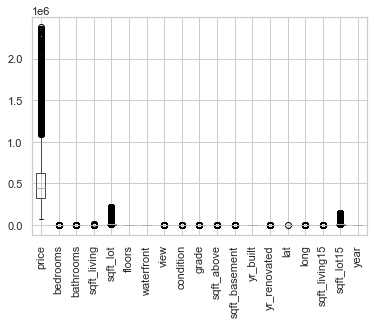

In [22]:
# Removing Outlier based on z-Score
from scipy import stats
col_list=[]

for col in df.columns:
    col_list.append(col)
print(col_list)

keys=[]
outlier_index=[]

for column in col_list:
    z= np.abs(stats.zscore(df[str(column)]))
    keys += np.where(z>5)[0].tolist()
    
for k in keys:
    if k not in outlier_index:
        outlier_index.append(k)

outlier_index.sort()

Cleaned_Data= df.drop(outlier_index)
    
Cleaned_Data.boxplot(rot= 90)


In [23]:
Cleaned_Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015


### Normalization

In [25]:
Target= ['price']
Pred= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year']

In [26]:
# Seperating Feautures from output
X, Y = Cleaned_Data[Pred].values, Cleaned_Data[Target].values

In [28]:
# Creating Stanndard Scalar Objects 
from sklearn.preprocessing import StandardScaler
Pred_std = StandardScaler()
Target_std = StandardScaler()

In [29]:
# Fitting data into the objects thereby normalizing / standardizing 

Pred_fit= Pred_std.fit(X)      # Will be used to inverse transform 
Target_fit = Target_std.fit(Y) # the final values back to original 

X_norm = Pred_fit.transform(X)
Y_norm = Target_fit.transform(Y)

### Splitting Data into Test and Train

In [30]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_norm , Y_norm ,test_size=0.2,random_state= 50)

# Model

In [31]:
# Libraries
from keras import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
import keras


In [32]:
################################################
#   All Possible Hyper Parameter Values
################################################
optimizer = [keras.optimizers.SGD, keras.optimizers.Adam, keras.optimizers.RMSprop]
lr = [0.001, 0.01, 0.1]
batch_size = [16,32,64,128]
epochs = [10,25, 50]
loss= ['mean_squared_error', "mean_absolute_error" , "mean_squared_logarithmic_error"]
act = ['relu', 'tanh', 'sigmoid']
neurons = [9,12,15]
Hidden_layers= [1,3,5]

In [33]:
# Helper function to get list of parameters which is used in plotting 
def get_para_list(result_, label):

    parameters_list=[]
    for i in range(len(result_.cv_results_['params'])):
        parameters_list.append(result_.cv_results_['params'][i][label])
    return parameters_list


In [48]:
################################################
#   Plotting the error vs parameters graph 
################################################
def plotting(result_, string):
        list_x = get_para_list(result_, string)
        list_y= result_.cv_results_['mean_test_score'].tolist()
        list_y= [e * -1 for e in list_y]
        
        if string =="optimizer":
                for i in range(len(list_x)):
                        list_x[i]= str(list_x[i])
                     
        f, ax = plt.subplots()
        ax.plot(list_x, list_y,marker= 'o',label= "MSE")
        ax.set_xticks(ticks = list_x)


        if string =="optimizer":
                xlabel= ["SGD", "ADAM", "RMS_Prop"]
                plt.xticks([0,1,2],xlabel)
                

        plt.xlabel(string +" Options")
        plt.ylabel("Mean Squared Error")
        ax.legend()

        print("Best Value for ", string, " is :" , result_.best_params_[string])
        print("Values:" , result_.best_params_)
        plt.show()

### Variable Model

In [49]:
def get_model( optimizer= keras.optimizers.Adam, learning_rate= 0.01, activation='sigmoid', loss= "mean_squared_error", neurons= 9, no_h_layer= 1):
    
    model= Sequential()

    model.add(Dense(units= 18, input_dim= 18, kernel_initializer= 'normal', activation= activation))
    for _ in range( no_h_layer):
        model.add(Dense(units= neurons, kernel_initializer= 'normal', activation= activation))
    model.add(Dense( 1 , kernel_initializer = 'normal'))
    
    model.compile(loss = loss , optimizer = optimizer(lr = learning_rate))
    
    return model 

In [50]:
model_ = KerasRegressor(build_fn=get_model, verbose=0)

## HyperParameter Tuning

Each section optimizes one parameter and then moves on to the next parameter while keeping the previous optimized parameter, the scoring used is mean squared error and 5 fold cross validation is used for evaluation. Then the evaluation is done by plotting various values for that hyperparameter against errrro , parrameter with the least error is taken 

### Optimizing Loss  Function

In [51]:
param_grid = dict(loss= loss)
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid , cv=5, scoring= "neg_mean_squared_error", verbose= 1)

In [52]:
result_loss = optimizer_.fit(X_norm, Y_norm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Value for  loss  is : mean_squared_error
Values: {'loss': 'mean_squared_error'}


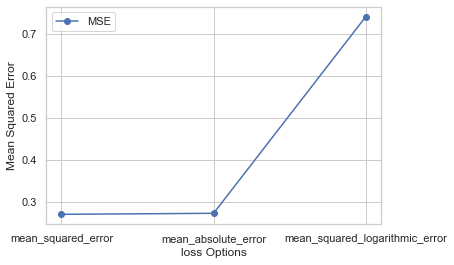

In [53]:
plotting(result_loss, "loss")

### Optimizing Batch Size

In [60]:
param_grid = dict(loss= ['mean_squared_error'],batch_size=batch_size)
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid , cv=5, scoring= "neg_mean_squared_error", verbose= 1)

In [61]:
result_optimizer = optimizer_.fit(X_norm, Y_norm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Best Value for  batch_size  is : 32
Values: {'batch_size': 32, 'loss': 'mean_squared_error'}


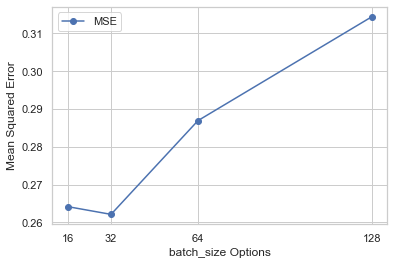

In [62]:
plotting(result_optimizer, "batch_size")

### Optimizing Epochs

In [67]:
param_grid = dict(loss= ['mean_squared_error'],batch_size= [32],  epochs= epochs)
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid , scoring= "neg_mean_squared_error", cv=5, verbose= 0)

In [68]:
result_Epochs = optimizer_.fit(X_norm, Y_norm, verbose= 0)

Best Value for  epochs  is : 25
Values: {'batch_size': 32, 'epochs': 25, 'loss': 'mean_squared_error'}


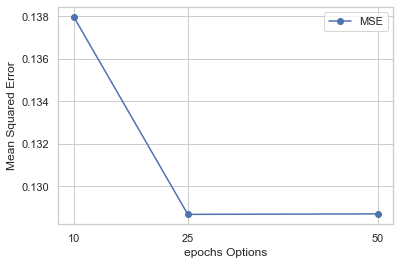

In [69]:
plotting(result_Epochs, "epochs")

### Optimizing Hidden Layers


In [70]:
param_grid = dict(loss= ['mean_squared_error'] ,batch_size= [32],   epochs= [50] , no_h_layer= Hidden_layers)
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid, scoring= "neg_mean_squared_error", cv=5, verbose= 1)

In [71]:
result_hl = optimizer_.fit(X_norm, Y_norm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Value for  no_h_layer  is : 1
Values: {'batch_size': 32, 'epochs': 50, 'loss': 'mean_squared_error', 'no_h_layer': 1}


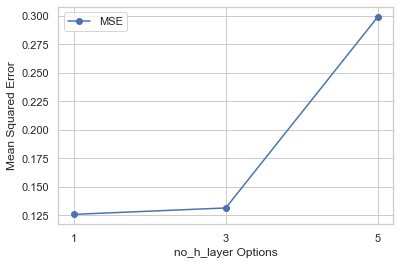

In [72]:
plotting(result_hl, "no_h_layer")

### Optimizing Number of Neurons


In [76]:
param_grid = dict(loss= ['mean_squared_error'],batch_size= [32],   epochs= [50], no_h_layer= [1], neurons = neurons)
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid, cv=5,scoring= "neg_mean_squared_error", verbose= 1)

In [77]:
result_NN = optimizer_.fit(X_norm, Y_norm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Value for  neurons  is : 12
Values: {'batch_size': 32, 'epochs': 50, 'loss': 'mean_squared_error', 'neurons': 12, 'no_h_layer': 1}


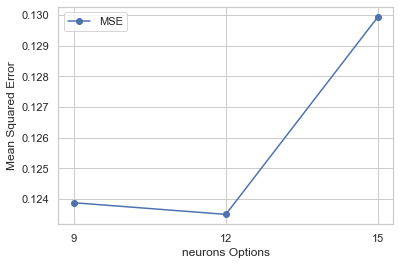

In [79]:
plotting(result_NN, "neurons")

### Optimizing activation function 

In [80]:
param_grid = dict(loss= ['mean_squared_error'],batch_size= [32],   epochs= [50], no_h_layer= [1] , neurons =[12], activation= act )
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid, cv=5,scoring= "neg_mean_squared_error" , verbose= 1)

In [81]:
result_act = optimizer_.fit( X_norm , Y_norm )

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Value for  activation  is : sigmoid
Values: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 50, 'loss': 'mean_squared_error', 'neurons': 12, 'no_h_layer': 1}


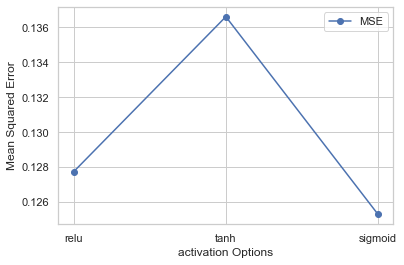

In [82]:
plotting(result_act, "activation")

### Optimizing Optimizer

In [83]:
param_grid = dict(loss= ['mean_squared_error'],batch_size= [32],   epochs= [50], no_h_layer= [1] , neurons =[12], activation= ['sigmoid'], optimizer= optimizer)
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid, scoring= "neg_mean_squared_error" , cv=5, verbose= 1)

In [84]:
result_op = optimizer_.fit( X_norm , Y_norm )

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Value for  optimizer  is : <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Values: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 50, 'loss': 'mean_squared_error', 'neurons': 12, 'no_h_layer': 1, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>}


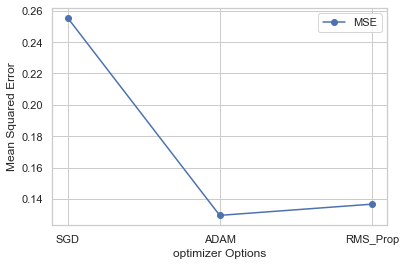

In [85]:
plotting(result_op, "optimizer")

### Optimizing Learning Rate

In [86]:
param_grid = dict(loss= ['mean_squared_error'],batch_size= [32],   epochs= [50], no_h_layer= [1] , neurons =[12], activation= ['sigmoid'], optimizer=[keras.optimizers.Adam], learning_rate= lr )
optimizer_= GridSearchCV(estimator= model_, param_grid=param_grid , cv=5, scoring="neg_mean_squared_error" , verbose= 1)

In [87]:
result_lr = optimizer_.fit( X_norm , Y_norm )

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Value for  learning_rate  is : 0.01
Values: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 50, 'learning_rate': 0.01, 'loss': 'mean_squared_error', 'neurons': 12, 'no_h_layer': 1, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>}


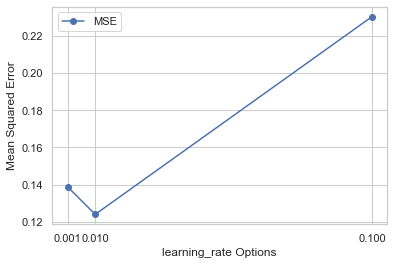

In [88]:
plotting(result_lr, "learning_rate")

### Implementing and Running Optimal Code

Running two models with 2 loss functions and all the optimal parameters that we got before. The models are plotted and evaluated on train and validation data to check for overfitting and loss. 

In [39]:
our_model_MSE= get_model(loss= 'mean_squared_error', neurons= 12, no_h_layer= 1,activation= 'sigmoid', optimizer= keras.optimizers.Adam, learning_rate= 0.01)
our_model_MAE= get_model(loss= 'mean_absolute_error', neurons= 12, no_h_layer= 1,activation= 'sigmoid', optimizer= keras.optimizers.Adam, learning_rate= 0.01)

In [40]:
history_MSE= our_model_MSE.fit(X_train, Y_train ,validation_split = 0.1,batch_size = 32, epochs = 50, verbose=0)
history_MAE= our_model_MAE.fit(X_train, Y_train ,validation_split = 0.1,batch_size = 32, epochs = 50, verbose=0)

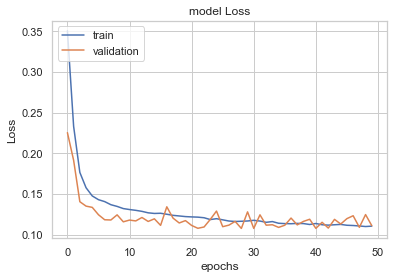

In [41]:
plt.plot(history_MSE.history['loss'])
plt.plot(history_MSE.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

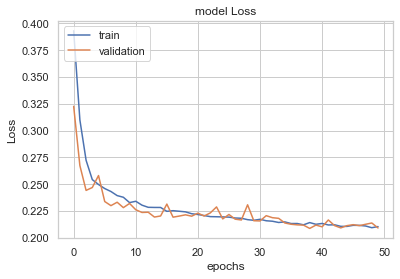

In [42]:
plt.plot(history_MAE.history['loss'])
plt.plot(history_MAE.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

No Overfitting is Observed the model performs weel for train as well as validation Set (Loss reduces for both )

In [43]:
##############################################
#           Evaluation Score
##############################################
print(our_model_MSE.evaluate(X_test, Y_test))
print(our_model_MAE.evaluate(X_test, Y_test))

132/132 [==============================] - 0s 582us/step - loss: 0.1304
0.13042578101158142
132/132 [==============================] - 0s 627us/step - loss: 0.2205
0.22049003839492798


In [44]:
##############################################
#           Pridiction Score (R2- Score)
##############################################
from sklearn.metrics import r2_score 
Predictions_MSE= our_model_MSE.predict(X_test)
Predictions_MAE= our_model_MAE.predict(X_test)

print("R2- Score for model with MSE loss: ",r2_score(Y_test, Predictions_MSE))
print("R2- Score for model with MAE loss: ",r2_score(Y_test, Predictions_MAE))


R2- Score for model with MSE loss:  0.866998117294807
R2- Score for model with MAE loss:  0.8681232492415388


### Comparing model prediction with actual Price 

In [45]:
##################################################
#     De-Normalizing Predictions and Dataset   
##################################################
Predictions= Target_fit.inverse_transform(Predictions_MSE)
y_test_orig= Target_fit.inverse_transform(Y_test)
Compare_pred = Pred_fit.inverse_transform(X_test)

In [46]:
##################################################
#  Printing out Prediction and actual Price   
##################################################
Compare_pred= pd.DataFrame(data= Compare_pred, columns=Pred)
Compare_pred['Price']= y_test_orig
Compare_pred['PredictedPrice']= Predictions
Compare_pred.drop(columns= Pred, inplace=True)
Compare_pred['PredictedPrice'] = Compare_pred['PredictedPrice'].round(2)
pd.set_option('display.float_format', lambda x: '%.3f'% x)

In [47]:
Compare_pred.sample(5)

,Price,PredictedPrice
3604,580135.000,514497.375
781,340000.000,370244.906
2165,790000.000,963313.250
1217,583500.000,528125.438
1006,730000.000,852062.812
